In [1]:
!pip install yfinance==0.1.74
!pip install mplcyberpunk
!pip install python-dotenv  

  Using cached yfinance-0.1.74-py2.py3-none-any.whl (27 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached mplcyberpunk-0.6.0-py3-none-any.whl (6.0 kB)
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)


In [2]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
from email.message import EmailMessage

[*********************100%***********************]  5 of 5 completed


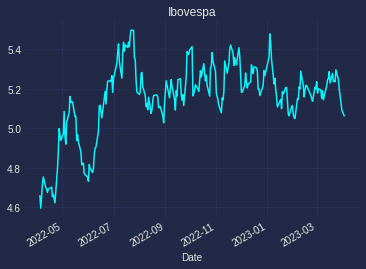

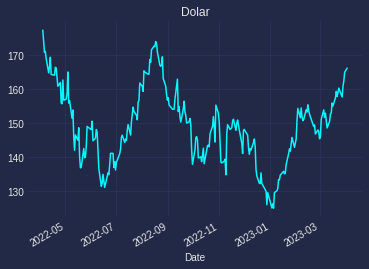

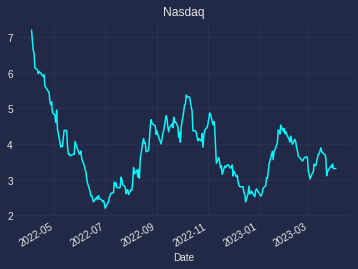

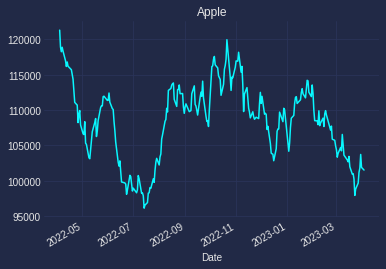

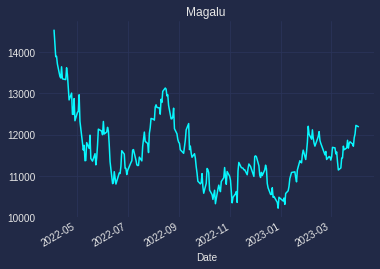

In [32]:
ativos = ["^BVSP", "BRL=X", "^IXIC", "AAPL", "MGLU3.SA"]

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(365)

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

dados_fechamento = dados_mercado['Adj Close']

dados_fechamento.columns = ['Dolar', 'Ibovespa', 'Nasdaq', 'Apple', "Magalu"]

dados_fechamento = dados_fechamento.dropna()


dados_fechamento_anual = dados_fechamento.resample("Y").last()
dados_fechamento_mensal = dados_fechamento.resample("M").last()

retorno_no_ano = dados_fechamento_anual.pct_change().dropna()
retorno_no_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_no_dia = dados_fechamento.pct_change().dropna()


retorno_dia_dolar = round(retorno_no_dia.iloc[-1, 0] * 100, 2)
retorno_dia_ibovespa = round(retorno_no_dia.iloc[-1, 1] * 100, 2)
retorno_dia_nasdaq = round(retorno_no_dia.iloc[-1, 2] * 100, 2)
retorno_dia_apple = round(retorno_no_dia.iloc[-1, 3] * 100, 2)
retorno_dia_magalu = round(retorno_no_dia.iloc[-1, 4] * 100, 2)

retorno_mes_dolar = round(retorno_no_mes.iloc[-1, 0] * 100, 2)
retorno_mes_ibovespa = round(retorno_no_mes.iloc[-1, 1] * 100, 2)
retorno_mes_nasdaq = round(retorno_no_mes.iloc[-1, 2] * 100, 2)
retorno_mes_apple = round(retorno_no_mes.iloc[-1, 3] * 100, 2)
retorno_mes_magalu = round(retorno_no_mes.iloc[-1, 4] * 100, 2)

retorno_ano_dolar = round(retorno_no_ano.iloc[-1, 0] * 100, 2)
retorno_ano_ibovespa = round(retorno_no_ano.iloc[-1, 1] * 100, 2)
retorno_ano_nasdaq = round(retorno_no_ano.iloc[-1, 2] * 100, 2)
retorno_ano_apple = round(retorno_no_ano.iloc[-1, 3] * 100, 2)
retorno_ano_magalu = round(retorno_no_ano.iloc[-1, 4] * 100, 2)

plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Ibovespa', use_index = True, legend = False)

plt.title("Ibovespa")

plt.savefig('ibovespa.png', dpi = 300)

plt.show()

plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Dolar', use_index = True, legend = False)

plt.title("Dolar")

plt.savefig('dolar.png', dpi = 300)

plt.show()

plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Nasdaq', use_index = True, legend = False)

plt.title("Nasdaq")

plt.savefig('nasdaq.png', dpi = 300)

plt.show()

plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Apple', use_index = True, legend = False)

plt.title("Apple")

plt.savefig('apple.png', dpi = 300)

plt.show()

plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Magalu', use_index = True, legend = False)

plt.title("Magalu")

plt.savefig('magalu.png', dpi = 300)

plt.show()